### Diagnosing breast cancer using KNN Algorithm

##### Load the dataset and necessary libraries

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

wbcd = pd.read_csv("wisc_bc_data.csv")
wbcd.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


#### Exploring and preparing the data

In [11]:
wbcd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 569 non-null    int64  
 1   diagnosis          569 non-null    object 
 2   radius_mean        569 non-null    float64
 3   texture_mean       569 non-null    float64
 4   perimeter_mean     569 non-null    float64
 5   area_mean          569 non-null    float64
 6   smoothness_mean    569 non-null    float64
 7   compactness_mean   569 non-null    float64
 8   concavity_mean     569 non-null    float64
 9   points_mean        569 non-null    float64
 10  symmetry_mean      569 non-null    float64
 11  dimension_mean     569 non-null    float64
 12  radius_se          569 non-null    float64
 13  texture_se         569 non-null    float64
 14  perimeter_se       569 non-null    float64
 15  area_se            569 non-null    float64
 16  smoothness_se      569 non

In [62]:
wbcd_without_id = wbcd.drop("id", axis=1)

In [63]:
wbcd_without_id.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [64]:
wbcd.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [21]:
round(wbcd["diagnosis"].value_counts(normalize=True)*100, 1)

B    62.7
M    37.3
Name: diagnosis, dtype: float64

In [33]:
wbcd.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [32]:
wbcd[["radius_mean", "area_mean", "smoothness_mean"]].describe()

,radius_mean,area_mean,smoothness_mean
count,569.000000,569.000000,569.000000
mean,14.127292,654.889104,0.096360
std,3.524049,351.914129,0.014064
min,6.981000,143.500000,0.052630
25%,11.700000,420.300000,0.086370
50%,13.370000,551.100000,0.095870
75%,15.780000,782.700000,0.105300
max,28.110000,2501.000000,0.163400


###### Data of all columns are not at the same scale. And we know distance calculation of KNN heavily depandent upon the measurement scale of the input features. so we need to rescale the data.

### Transformation - normalizing the numeric data

In [79]:
#sample normalization
data = {"Roll": [1, 2, 3, 4, 5], "Age":[11, 22, 33, 44, 55]}
df = pd.DataFrame(data)
df

,Roll,Age
0,1,11
1,2,22
2,3,33
3,4,44
4,5,55


In [60]:
scaler = MinMaxScaler()
scaler.fit(df)
scaled = pd.DataFrame(scaler.transform(df), columns=df.columns)
scaled

,Roll,Age
0,0.00,0.00
1,0.25,0.25
2,0.50,0.50
3,0.75,0.75
4,1.00,1.00


In [119]:
scaler = StandardScaler()
scaler.fit(df)
scaled = pd.DataFrame(scaler.transform(df), columns=df.columns)
scaled

,Roll,Age
0,-1.414214,-1.414214
1,-0.707107,-0.707107
2,0.000000,0.000000
3,0.707107,0.707107
4,1.414214,1.414214


##### Set the target Variable and the feature variables

In [75]:
X = wbcd_without_id.loc[:, wbcd_without_id.columns != 'diagnosis']
y = wbcd_without_id['diagnosis']

#### Normalize the target Variables

In [76]:
scaler.fit(X)
scaled = pd.DataFrame(scaler.transform(X), columns=X.columns)
scaled.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,0.252686,0.090632,0.242278,0.135992,0.452920,0.154684,0.093416,0.183897,0.454040,0.201980,...,0.198150,0.096482,0.182081,0.089437,0.444628,0.096351,0.099201,0.322715,0.248768,0.083104
1,0.171281,0.312479,0.176145,0.086066,0.399476,0.292375,0.149649,0.131312,0.435354,0.314869,...,0.140519,0.291045,0.138802,0.058887,0.331044,0.217530,0.153035,0.272371,0.271043,0.136626
2,0.192106,0.240785,0.187478,0.097434,0.497156,0.179928,0.071368,0.123260,0.330303,0.283067,...,0.159374,0.384328,0.147019,0.070340,0.434062,0.117307,0.085224,0.255361,0.282476,0.155910
3,0.203464,0.124450,0.201852,0.102354,0.575697,0.289001,0.108599,0.238370,0.359091,0.226622,...,0.141942,0.099947,0.130086,0.061148,0.432741,0.150294,0.069241,0.295911,0.105855,0.083956
4,0.388518,0.118363,0.372193,0.241060,0.243748,0.153242,0.079499,0.132058,0.333838,0.115417,...,0.294201,0.098881,0.269386,0.155795,0.273592,0.142048,0.108786,0.281031,0.181747,0.082776


In [78]:
scaled['area_mean'].describe()

count    569.000000
mean       0.216920
std        0.149274
min        0.000000
25%        0.117413
50%        0.172895
75%        0.271135
max        1.000000
Name: area_mean, dtype: float64

#### Divided the data in train and test split

In [94]:
X_train, X_test, y_train, y_test = train_test_split(scaled, y, test_size=.18, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (466, 30) (466,)
Test set: (103, 30) (103,)


#### Find the best opitmal value for the K

In [167]:
#import sklearn.metrics as metrics
k_range = range(1, 26)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
print(scores)

[0.9320388349514563, 0.9223300970873787, 0.9514563106796117, 0.9611650485436893, 0.9611650485436893, 0.941747572815534, 0.9611650485436893, 0.9514563106796117, 0.9611650485436893, 0.941747572815534, 0.9514563106796117, 0.941747572815534, 0.9514563106796117, 0.941747572815534, 0.941747572815534, 0.941747572815534, 0.941747572815534, 0.9320388349514563, 0.9320388349514563, 0.941747572815534, 0.941747572815534, 0.941747572815534, 0.941747572815534, 0.941747572815534, 0.9514563106796117]


Text(0, 0.5, 'Testing Accuracy')

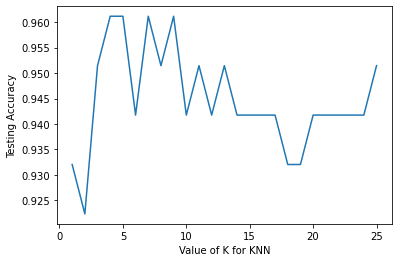

In [168]:
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

### Here we see that when the value of k=4, the accuracy is highest.So for this data set we use K= 4

#### Create the model 

In [169]:
k = 4
neigh = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
neigh

KNeighborsClassifier(n_neighbors=4)

In [170]:
# prediction
predictions = neigh.predict(X_test)

#### Evaluating model performance

In [171]:
print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))
print("Accuracy Score:", accuracy_score(y_test, predictions))

Confusion Matrix:
 [[64  0]
 [ 4 35]]
Accuracy Score: 0.9611650485436893


# Improving model performance
###### -> First employ an alternative method for rescaling numeric data
###### -> Secondly try several different value for the K

In [ ]:
# Data Tranformation using standard scaller

In [126]:
scaler = StandardScaler()
scaler.fit(X)
scaled_s = pd.DataFrame(scaler.transform(X), columns=X.columns)
scaled_s.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,-0.513297,-1.605595,-0.540376,-0.542624,0.458285,-0.654413,-0.614306,-0.307442,0.538081,-0.460382,...,-0.573451,-1.634499,-0.604391,-0.582718,0.268776,-0.812128,-0.709978,-0.315133,-0.119321,-0.899721
1,-1.001801,-0.079038,-0.934566,-0.877375,0.036986,0.196319,-0.312987,-0.580343,0.402996,0.299453,...,-0.908925,-0.445740,-0.863230,-0.801227,-0.485202,-0.017590,-0.386625,-0.538203,0.063489,-0.447528
2,-0.876835,-0.572377,-0.867014,-0.801153,0.806996,-0.498443,-0.732448,-0.622129,-0.356400,0.085395,...,-0.799171,0.124213,-0.814083,-0.719308,0.198638,-0.674722,-0.793935,-0.613574,0.157320,-0.284606
3,-0.808671,-1.372888,-0.781338,-0.768161,1.426135,0.175472,-0.532950,-0.024740,-0.148296,-0.294523,...,-0.900641,-1.613330,-0.915355,-0.785054,0.189871,-0.458434,-0.889933,-0.433901,-1.292212,-0.892517
4,0.301824,-1.414775,0.234000,0.161860,-1.190618,-0.663320,-0.688883,-0.576473,-0.330843,-1.043018,...,-0.014328,-1.619844,-0.082245,-0.108082,-0.866574,-0.512506,-0.652408,-0.499832,-0.669366,-0.902492


In [135]:
X_train, X_test, y_train, y_test = train_test_split(scaled_s, y, test_size=.18, random_state=4)
print("Train set:", X_train.shape, y_train.shape)
print("Test set:", X_test.shape, y_test.shape)

Train set: (466, 30) (466,)
Test set: (103, 30) (103,)


In [154]:
K = 21
neigh = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
neigh

KNeighborsClassifier(n_neighbors=21)

In [152]:
predictions = neigh.predict(X_test)

In [153]:
print("Confusion matrix:\n", confusion_matrix(y_test, predictions))
print("Accuracy score:", accuracy_score(y_test, predictions))

Confusion matrix:
 [[64  0]
 [ 6 33]]
Accuracy score: 0.941747572815534


### Accuracy score is not imporve thean the previous